# Analisi COVID19 regionale

In questo notebook riportiamo l'andamento dei dati regionali sulla diffusione della malattia COVID19.

## Caricamento dati 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams

# Arial, default font
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "sans-serif"

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator(interval=2) # every day
years_fmt = mdates.DateFormatter('%d-%m-%Y')

In [2]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
df = pd.read_csv(url)
print( 'Dati aggiornati al giorno ', df['data'].iloc[-1])
#df.head(40)

Dati aggiornati al giorno  2020-11-28T17:00:00


In [3]:
# colonna giorno
df['giorno'] = df['data'].str.slice(start=0, stop=10)

df['giorno'] = df['giorno'].apply(lambda x: np.datetime64(x))

primo_giorno = df['giorno'].iloc[0]
ultimo_giorno = df['giorno'].iloc[-1]

df.to_csv('dati_andamento_regionale')
df

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,giorno
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0,NaN,NaN,0,5,NaN,NaN,2020-02-24
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,0,NaN,NaN,0,0,NaN,NaN,2020-02-24
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,0,0,NaN,NaN,0,1,NaN,NaN,2020-02-24
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,0,0,NaN,NaN,0,10,NaN,NaN,2020-02-24
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,18,0,0,NaN,NaN,18,148,NaN,NaN,2020-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,2020-11-28T17:00:00,ITA,19,Sicilia,38.115697,13.362357,1519,247,1766,38116,...,1189,20181,1461,37424.0,24100.0,61524,942356,644441.0,NaN,2020-11-28
5855,2020-11-28T17:00:00,ITA,9,Toscana,43.769231,11.255889,1593,279,1872,43200,...,1196,54005,2563,77917.0,23723.0,101640,1543449,948551.0,NaN,2020-11-28
5856,2020-11-28T17:00:00,ITA,10,Umbria,43.106758,12.388247,351,64,415,8238,...,348,14388,389,6545.0,16885.0,23430,412818,223404.0,NaN,2020-11-28
5857,2020-11-28T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,130,14,144,1321,...,72,4641,310,5714.0,702.0,6416,59088,33335.0,NaN,2020-11-28


In [4]:
#elenco regioni
regioni = {'Abruzzo':13, 'Basilicata':17, 'Calabria':18, 'Campania':15, 'Emilia-Romagna':8, 
           'Friuli Venezia Giulia':6, 'Lazio':12, 'Liguria':7, 'Lombardia':3,
           'Marche':11, 'Molise':14, 'P.A. Bolzano':21, 'P.A. Trento':22, 'Piemonte':1,
           'Puglia':16, 'Sardegna':20, 'Sicilia':19, 'Toscana':9, 'Umbria':10,
           'Valle d\'Aosta':2, 'Veneto':5
          }

In [5]:
# funzione grafici
def set_graphix(ax, legend=True):
    # format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(days)

    plt.sca(ax)
    plt.xticks(fontsize='large')

    # round to nearest days.
    datemin = np.datetime64(primo_giorno, 'D')-1
    datemax = np.datetime64(ultimo_giorno, 'D') +5
    ax.set_xlim(datemin, datemax)
    
    ax.grid(True)

    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate(ha='center')
 
    #set legend
    if legend:
        ax.legend(fontsize='x-large', loc='upper left' )

## Andamento contagi

Confrontiamo l'andamento dei contagi con guariti e decessi.

<ipython-input-6-c91381f79c3a>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,6))


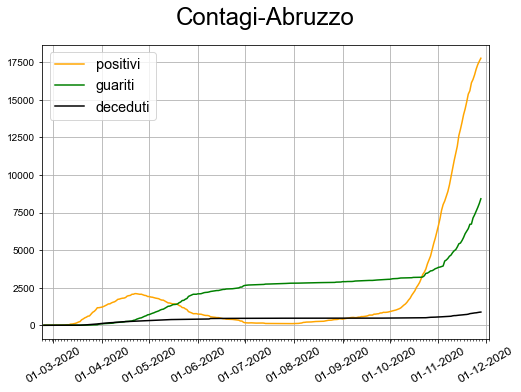

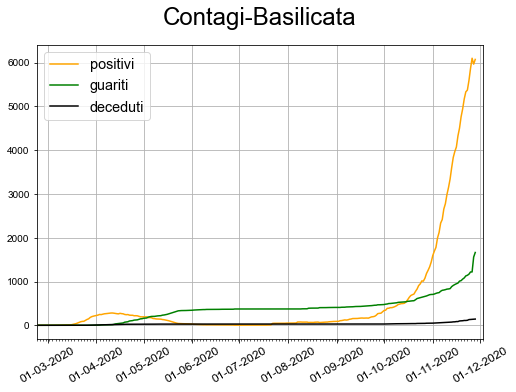

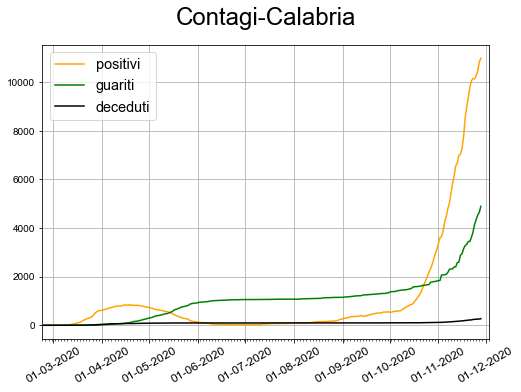

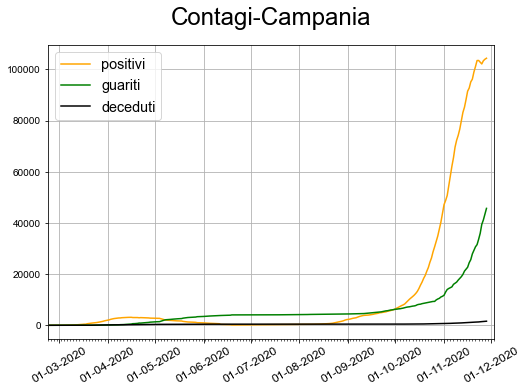

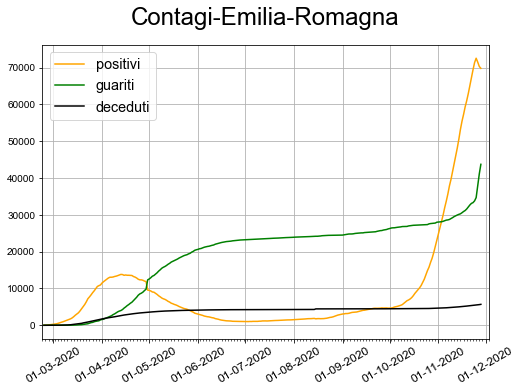

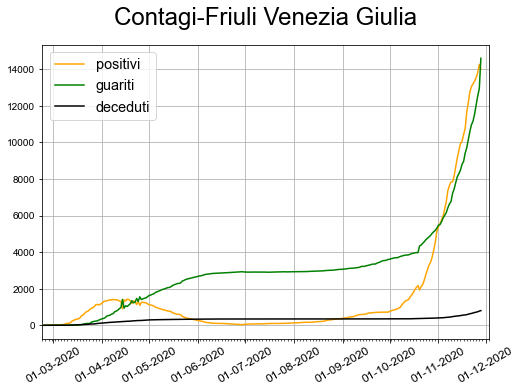

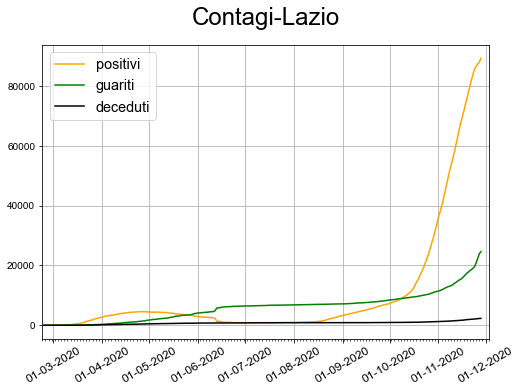

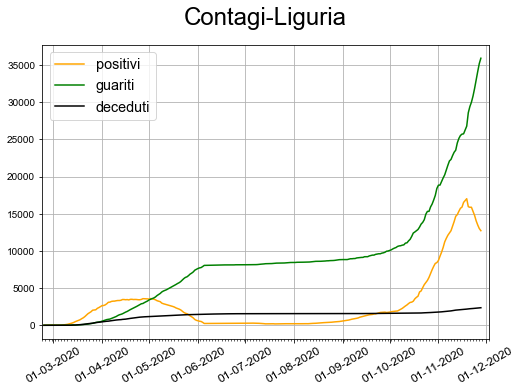

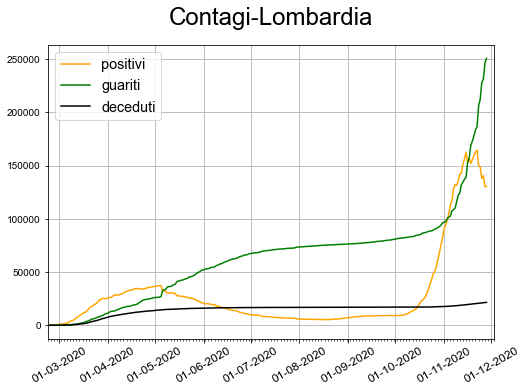

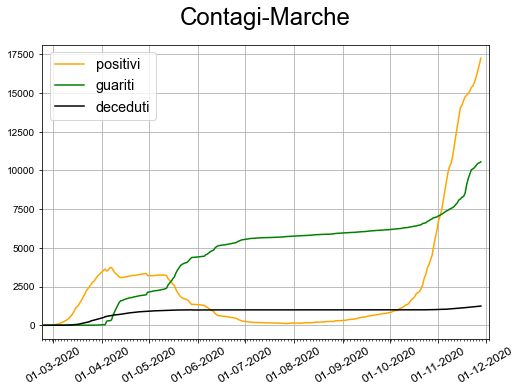

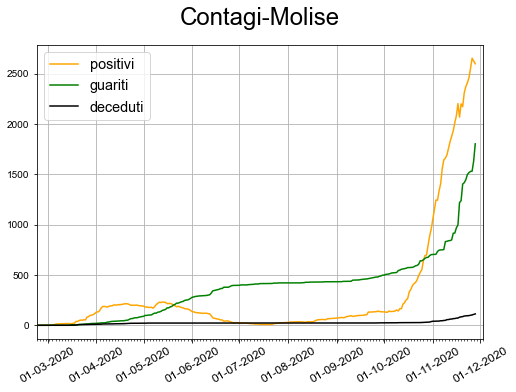

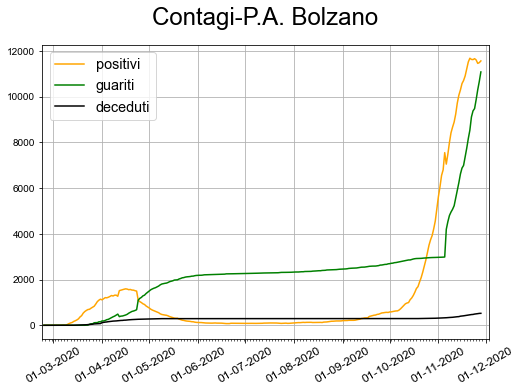

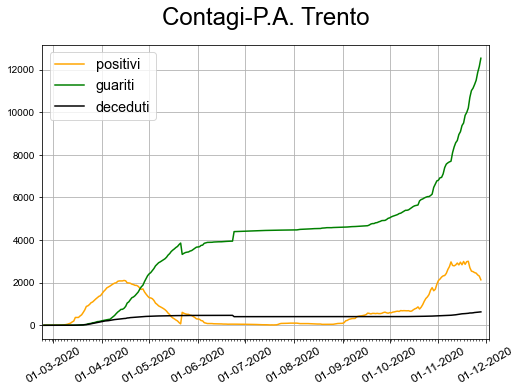

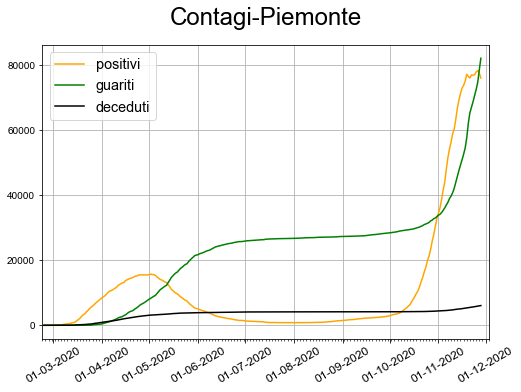

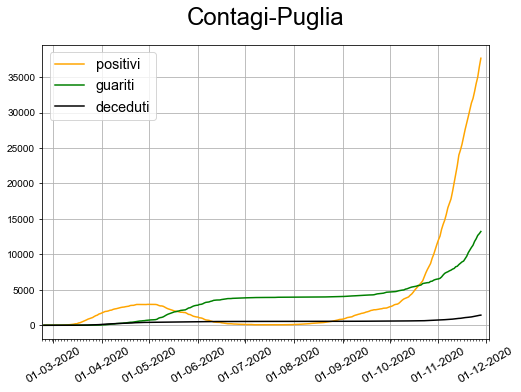

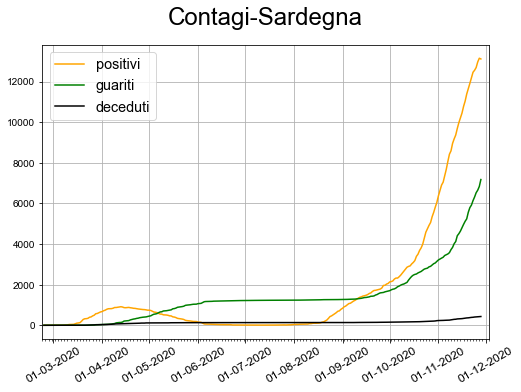

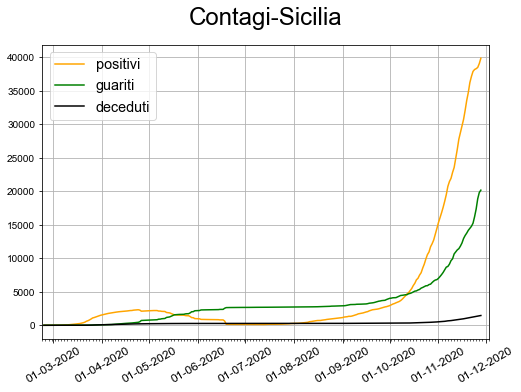

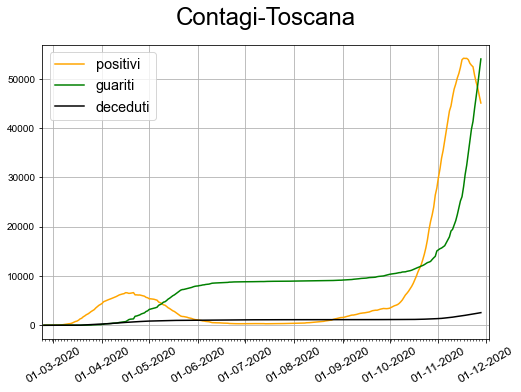

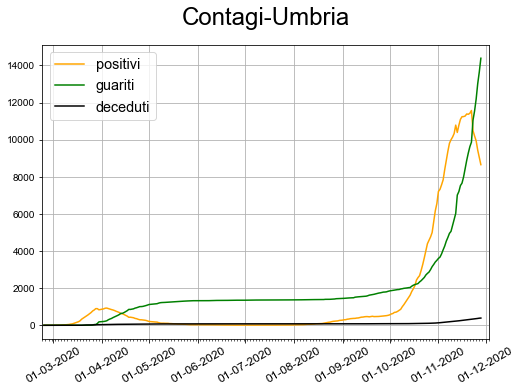

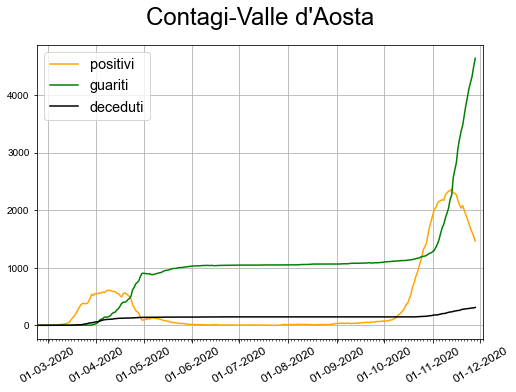

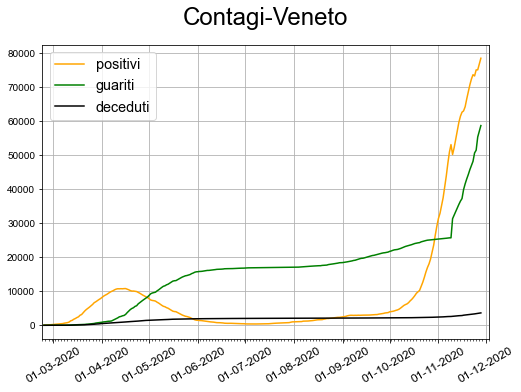

In [6]:
giorni = pd.date_range(primo_giorno, ultimo_giorno)
for regione in regioni:
    # dati
    df_reg = df[df['codice_regione']==regioni[regione]]
    positivi = df_reg['totale_positivi']
    guariti = df_reg['dimessi_guariti']
    deceduti = df_reg['deceduti']
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(giorni, positivi,'orange', label='positivi' )
    ax.plot(giorni, guariti, 'green', label='guariti')
    ax.plot(giorni, deceduti, 'black', label='deceduti')
    ax.set_title(f'Contagi-{regione}', fontsize=24, pad=20 )

    set_graphix(ax)

plt.show()

### Confronto ricoverati-isolamento

<ipython-input-7-41e619c79233>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12,10))


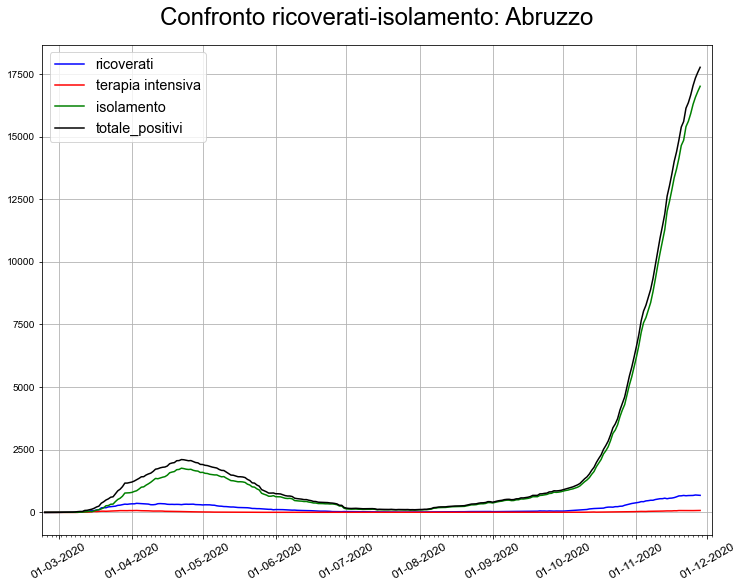

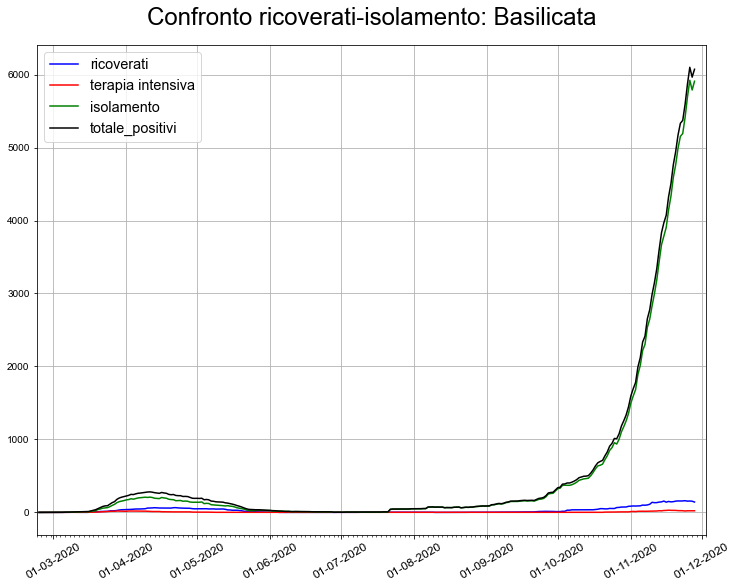

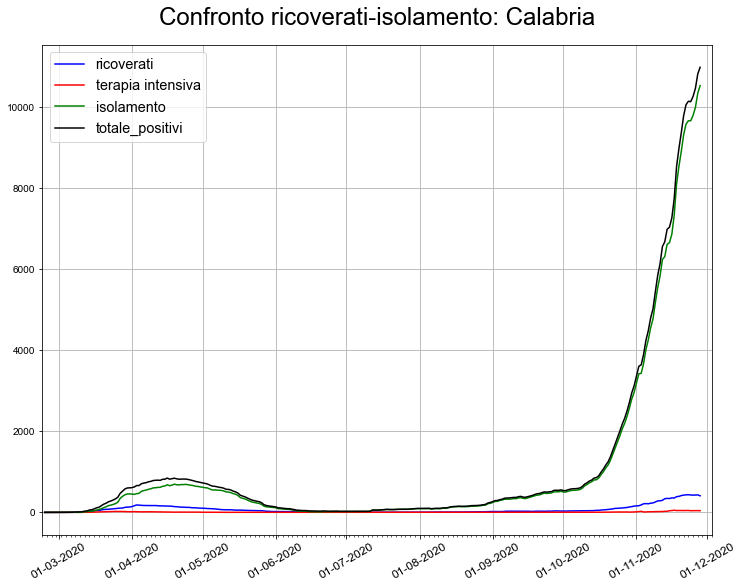

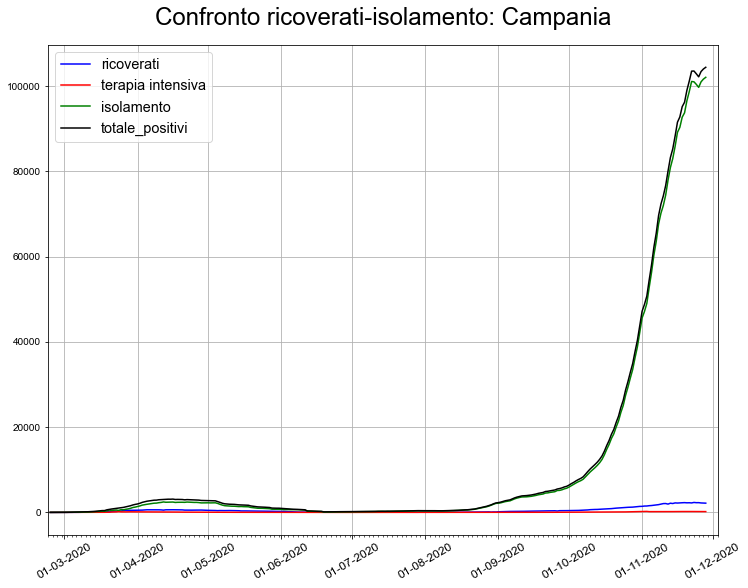

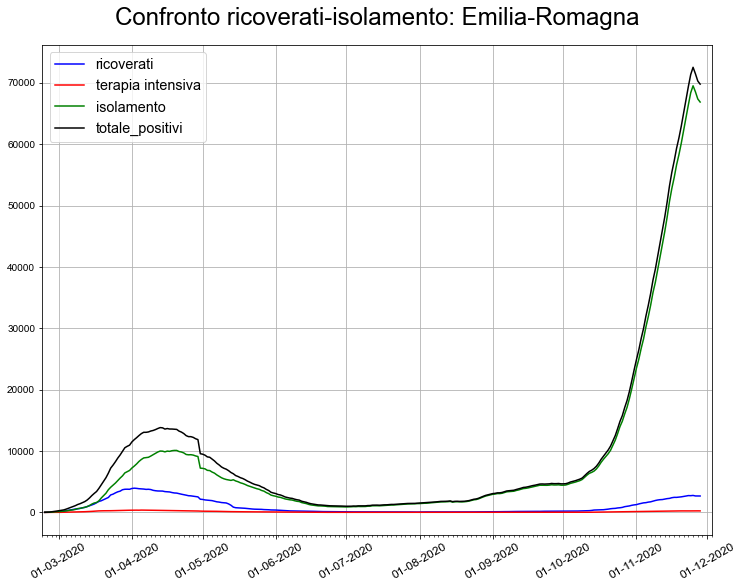

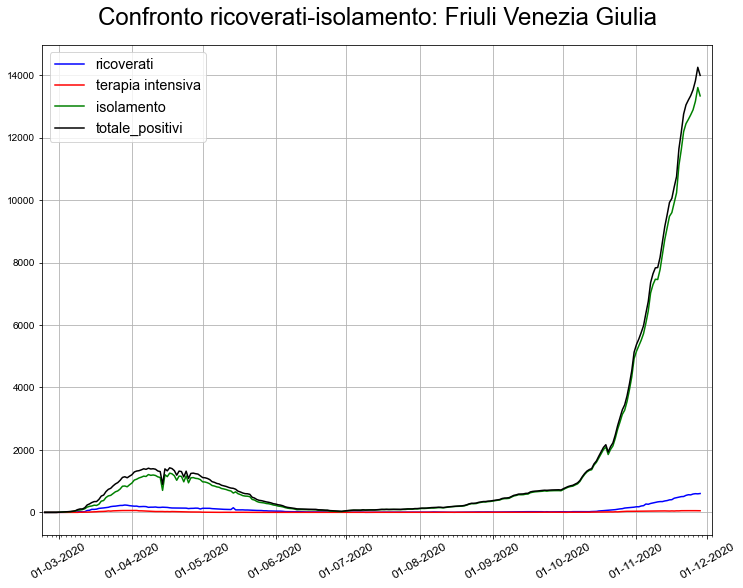

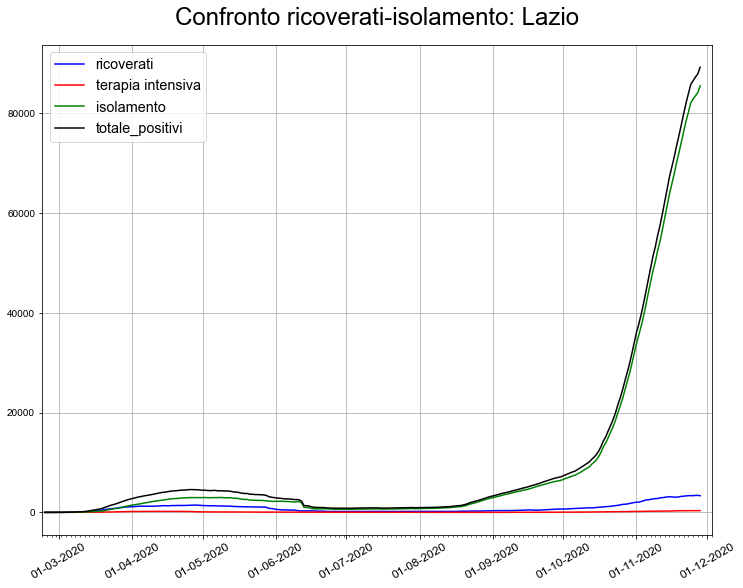

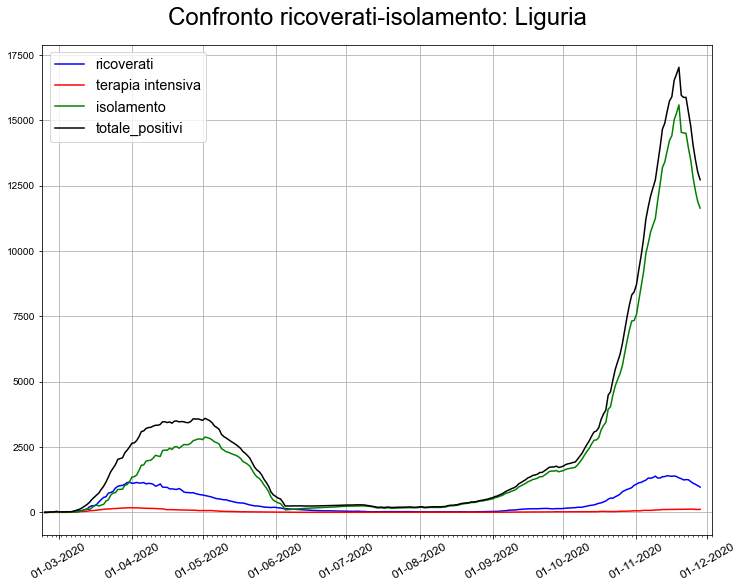

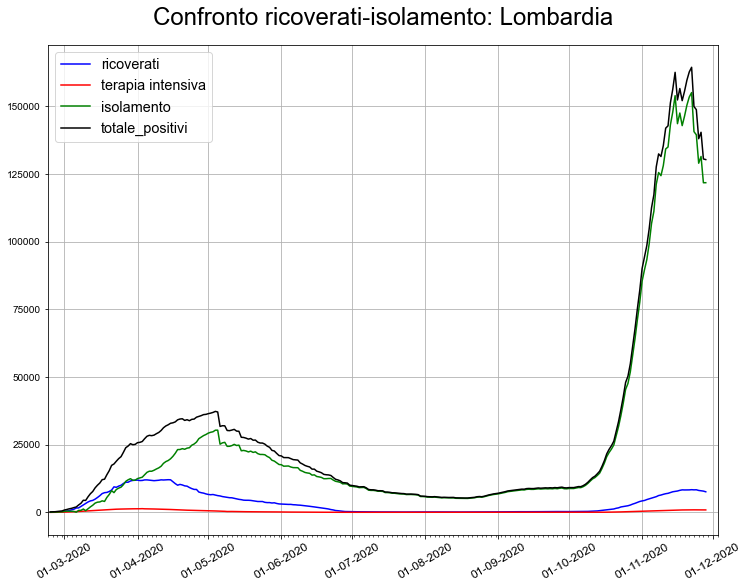

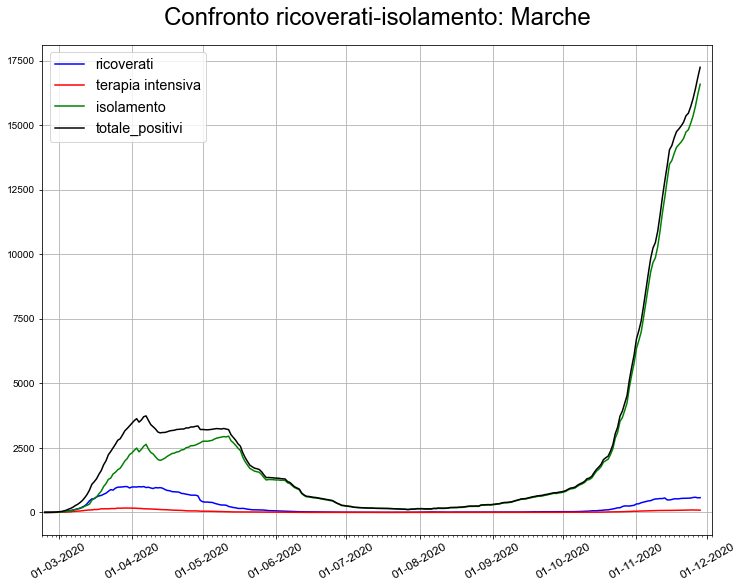

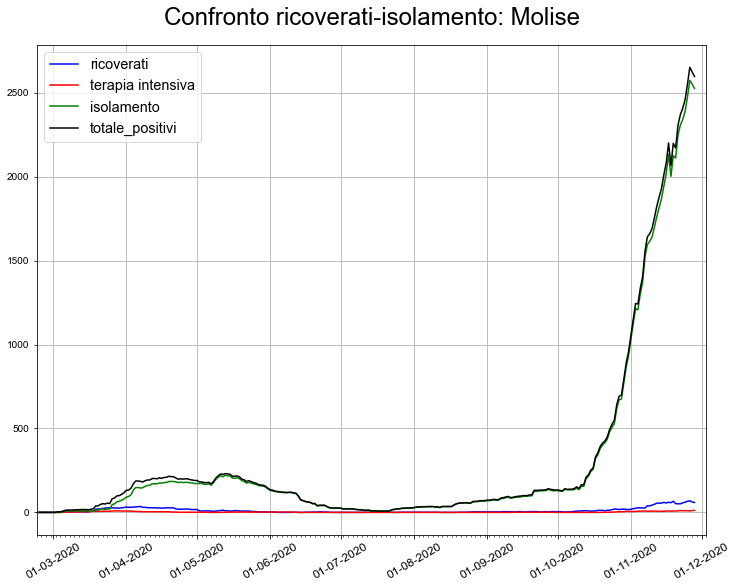

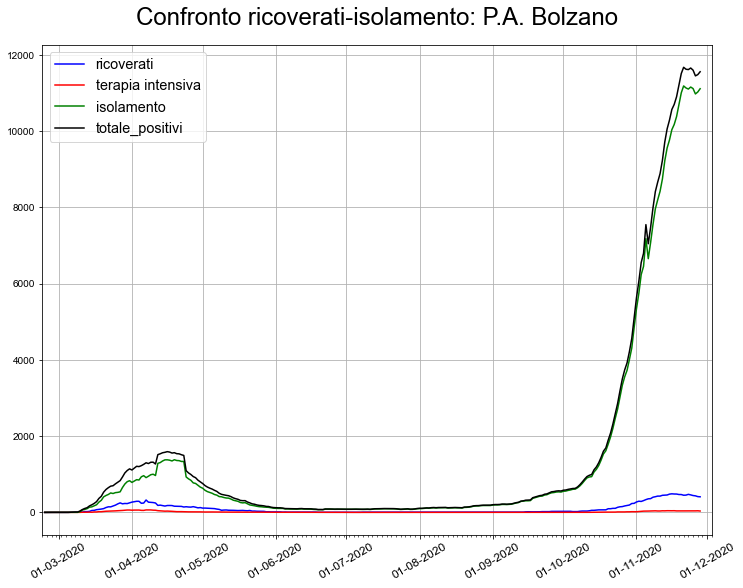

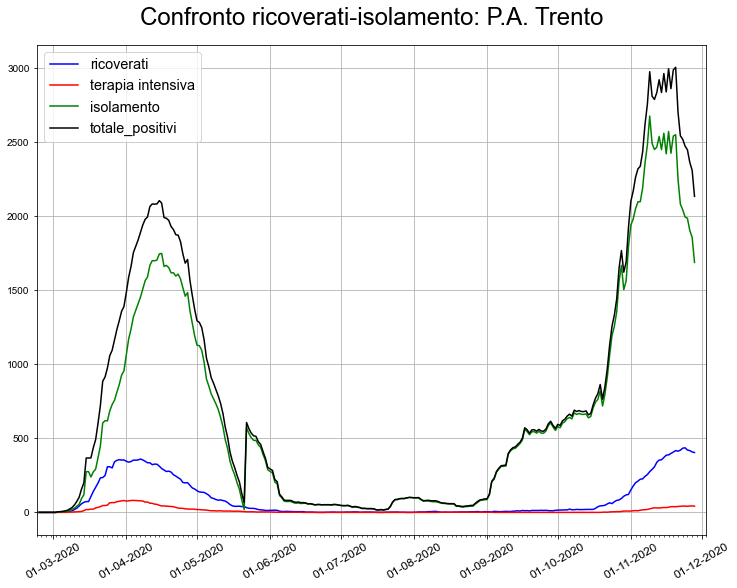

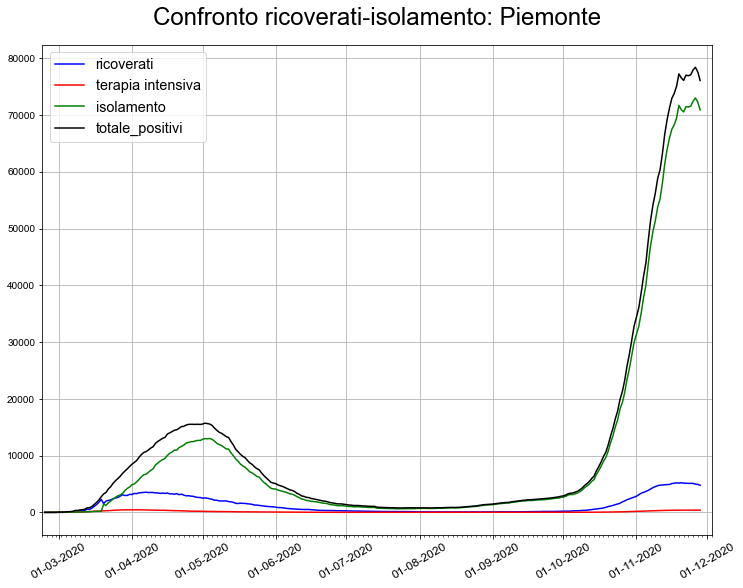

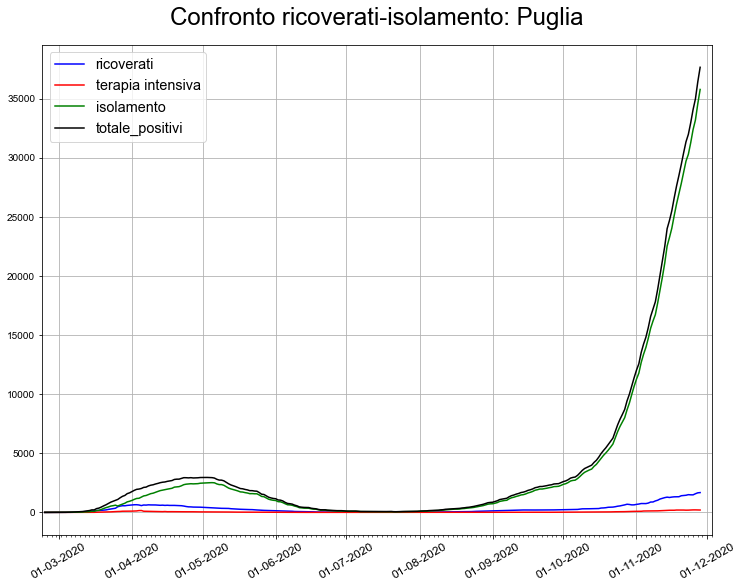

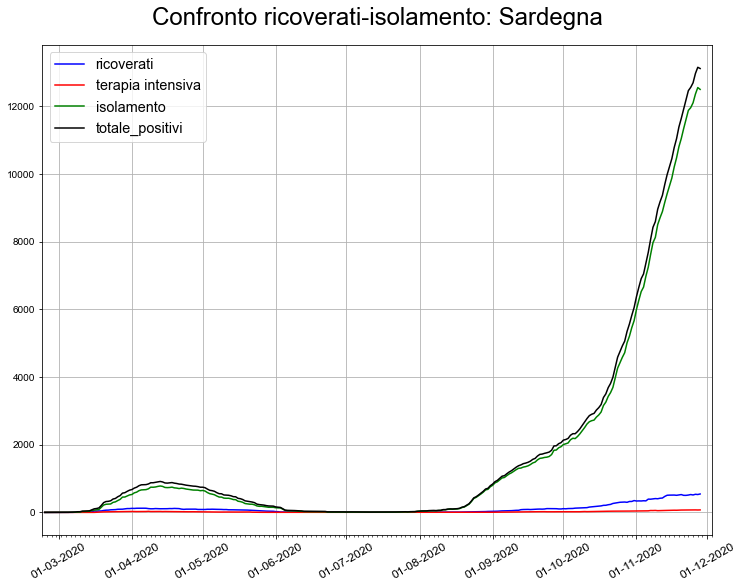

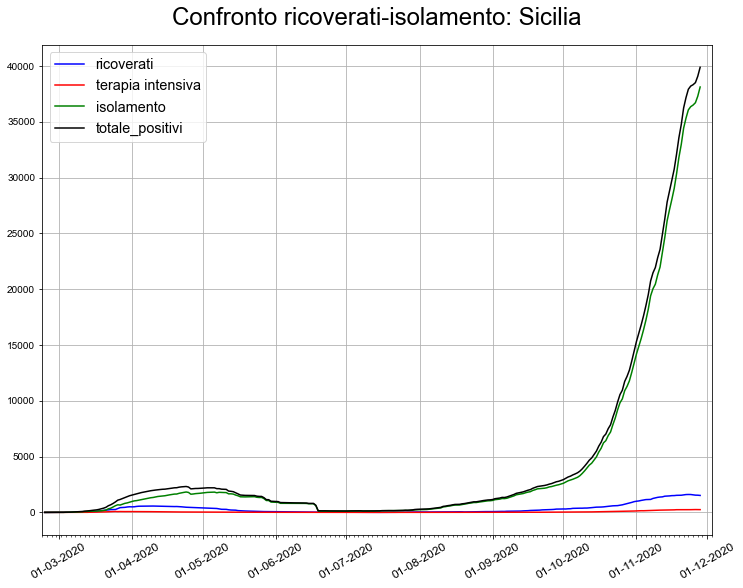

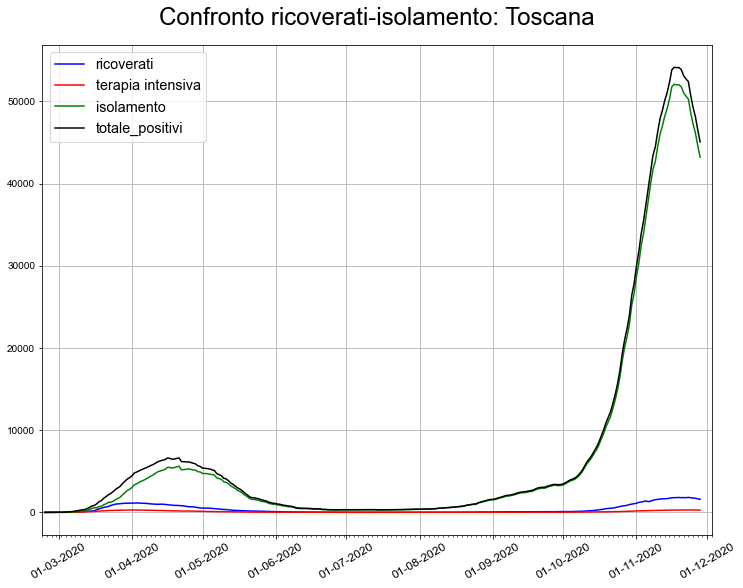

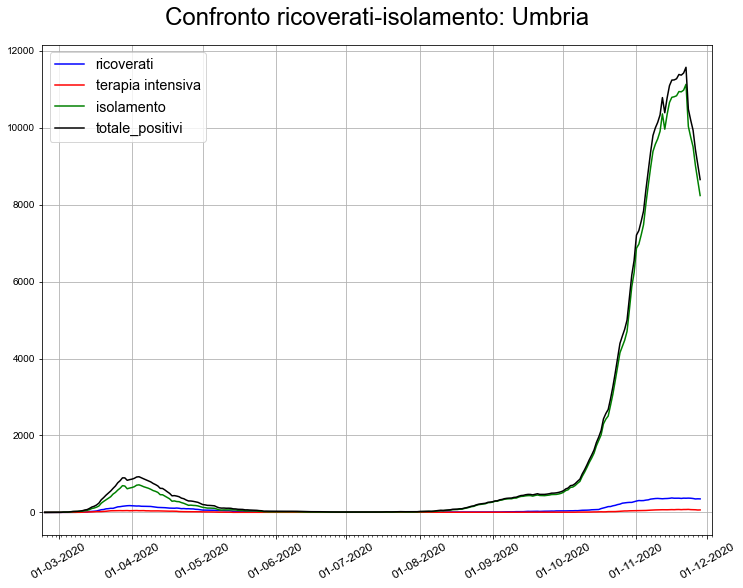

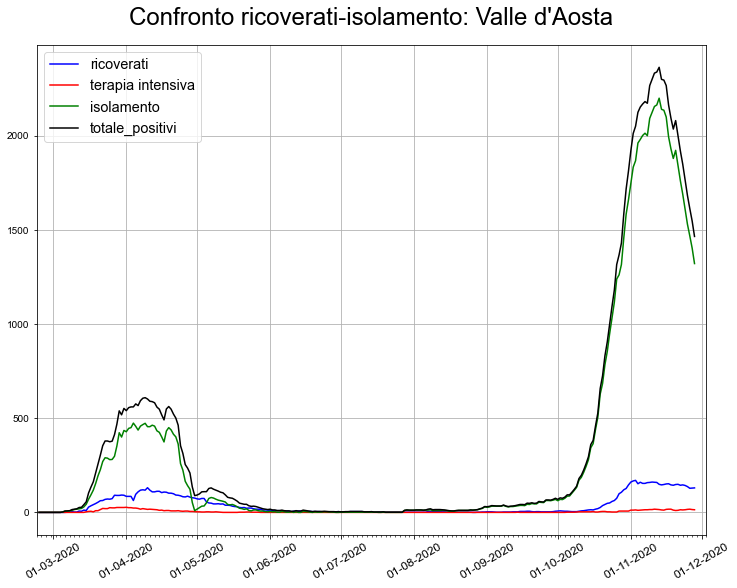

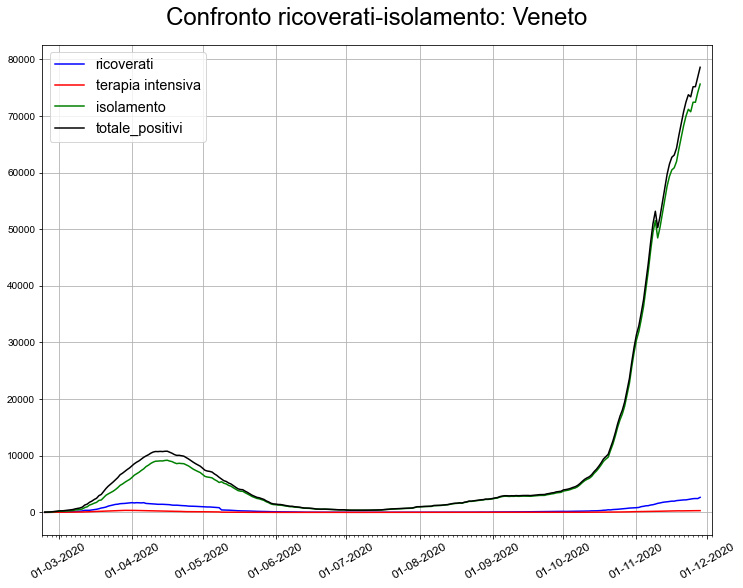

In [7]:
for regione in regioni:
    #dati
    df_reg = df[df['codice_regione']==regioni[regione]]
    ricoverati = df_reg['ricoverati_con_sintomi']
    ric_gravi = df_reg['terapia_intensiva']
    isolamento = df_reg['isolamento_domiciliare']
    ric_totali = df_reg['totale_ospedalizzati']
    positivi = df_reg['totale_positivi']

    #plot
    fig, ax = plt.subplots(figsize=(12,10))
    ax.plot(giorni, ricoverati, 'b', label='ricoverati')
    ax.plot(giorni, ric_gravi, 'r', label='terapia intensiva')
    ax.plot(giorni, isolamento, 'g', label='isolamento')
    ax.plot(giorni, positivi, 'black', label='totale_positivi')
    ax.set_title(f'Confronto ricoverati-isolamento: {regione}', fontsize=24, pad=20 )
    set_graphix(ax)
    
plt.show()